# Question 1

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Sets the plots to be displayed and saved in notebook
%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,10)

col_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('q1.csv',names=col_names)
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [63]:
#Converts some nominal data to numeric for analysis
cars['fuel_type'].replace(['gas','diesel'],[1,0],inplace=True)
cars['aspiration'].replace(['std','turbo'],[0,1],inplace=True)
cars.replace('?',np.nan,inplace=True)
cars.head(205)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,1,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,1,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,1,0,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,1,0,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,1,0,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,1,1,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,1,0,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,0,1,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [64]:
#Select features to be considered for KNN
use_feature=['normalized_losses','fuel_type','aspiration','wheel_base','length','width','height','curb_weight','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars=cars[use_feature].copy()
cars.head(205)

,normalized_losses,fuel_type,aspiration,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,1,0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,1,0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,1,0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,1,0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,1,0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,1,0,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,1,1,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,1,0,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,0,1,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


In [65]:
#Converts all columns to numeric type
cars.dtypes
num=['normalized_losses','bore','stroke','horsepower','peak_rpm','price']
cars[num]=cars[num].astype(float)
cars.dtypes

normalized_losses    float64
fuel_type              int64
aspiration             int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [66]:
#Replaces Nan values with mean of thier column
cars.fillna(cars.mean(),inplace=True)

In [67]:
#Normalize Atribute values to range 0 to 1
t=cars['price']
cars=(cars-cars.min())/(cars.max()-cars.min())
cars['price']=t
cars.head()

,normalized_losses,fuel_type,aspiration,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,1.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,1.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,1.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


In [68]:
## Function to calculate eucledian distance
def euc_dist(a,b):
    d = np.sqrt(np.sum(pow(a-b,2)))
    return d

##Function to calculate K Nearest Neighbours

def KNN (train_data,price,test_data,k):
    pred=[] #Value predicted by model
    
    for tid,test in test_data.iterrows():
        
        distances=[] ## Stores distance of test point from training points
        trainid=[]
        
        ##Calculates eucledian distance between test and train points
        
        for trid,train in train_data.iterrows():
            d = euc_dist(np.array(train),np.array(test))
            distances.append(d)
            trainid.append(trid)
        
        distances=np.array(distances)
        trainid=np.array(trainid)
       
        ##Finds k nearest neighbors and thier values
        
        nearest=trainid[np.argsort(distances)[:k]]
        near_values= [price[n] for n in nearest]
        
        ## Takes average of nearest neighbors values and appends to result
        pred.append(np.average(near_values))
    
    return pred

## Calculates Root Mean Square Error

def rmse(actual,predicted):
    return np.sqrt(np.sum((actual-predicted)**2)/len(actual))


In [69]:
f=use_feature.copy() ##Copies use_feature list
f.remove('price') ##Removes 'price' as element so it is not passed as feature to be used in prediction
test_k=[x for x in range(1,144,2)] ##Different K values to be tested 

## Split into train and val set in ratio 70:30

train_set = cars[0:int(len(cars)*0.7)]
val_set = cars[int(len(cars)*0.7):]


rmse_k={} ##Stores error of prediction for each value of K
for k in test_k:
    pred = KNN(train_set[f],train_set['price'],val_set[f],k)
    rmse_k[k]=(rmse(val_set['price'],pred))

print("RMSE values for different values of K : ")
rmse_k

RMSE values for different values of K : 


{1: 3428.3948515397865,
 3: 2801.9297139406976,
 5: 3047.1538026531707,
 7: 2772.9829305151766,
 9: 2672.907947987689,
 11: 2786.7856535456262,
 13: 2623.8782985288844,
 15: 2502.6475954906655,
 17: 2298.5926789168734,
 19: 2180.689274178214,
 21: 2141.7631066843146,
 23: 1988.799127245447,
 25: 1937.5244070762985,
 27: 1982.8317603657817,
 29: 1998.6805053343292,
 31: 2009.423481665927,
 33: 1966.8433839020524,
 35: 1893.357324831832,
 37: 1864.3296648019468,
 39: 1906.9280229327728,
 41: 1903.6955257469983,
 43: 1894.3949723962562,
 45: 1897.1137031509993,
 47: 1932.1499931763174,
 49: 1944.8617892879713,
 51: 1991.541105114998,
 53: 2005.6503932830185,
 55: 2039.5525433412824,
 57: 2005.5134968667553,
 59: 2045.7475949316245,
 61: 2021.7947661703301,
 63: 2043.5662708596058,
 65: 2049.5468412472915,
 67: 2054.507726820561,
 69: 2078.2927783166137,
 71: 2092.4038551469434,
 73: 2151.3107900885084,
 75: 2205.0432610336807,
 77: 2280.176364085224,
 79: 2305.7816076167237,
 81: 2359.212

Best Model Parameter is K =  37 with RMSE of  1864.3296648019468


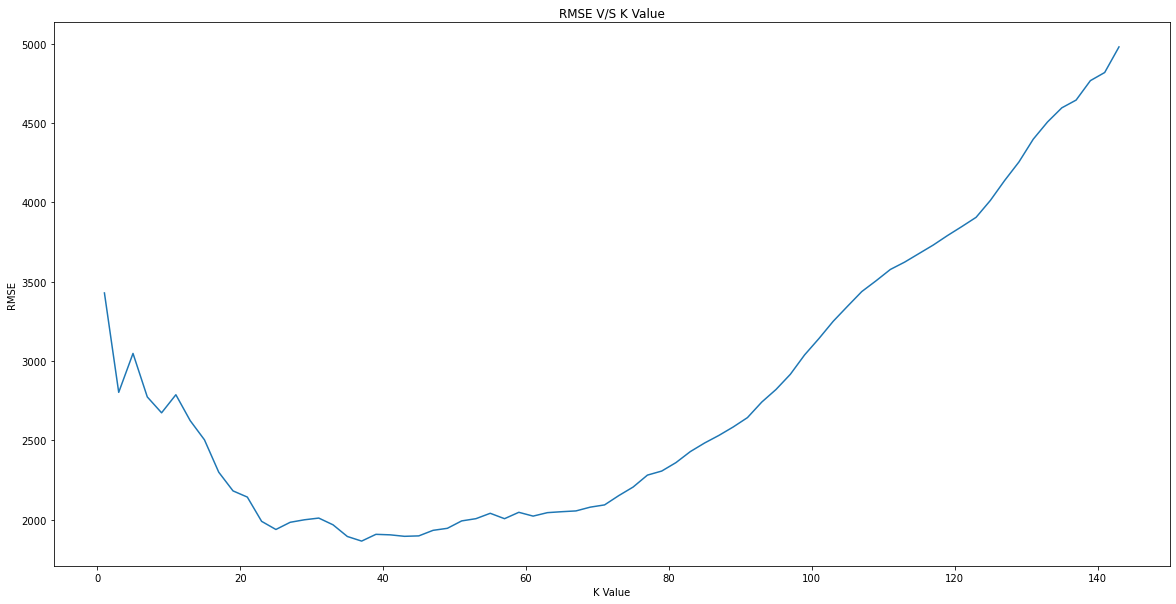

In [71]:
fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_k.values()])
keys=[k for k in rmse_k.keys()]

ax.plot(test_k, values)
ax.set_xlabel('K Value')
ax.set_ylabel('RMSE')
ax.set_title('RMSE V/S K Value')


print("Best Model Parameter is K = ",keys[list(values).index(values.min())],'with RMSE of ',values.min())

## CONCLUSIONS

It is seen from above graph, best model is with parameter <B>K = 37 </B> with <B>Root Mean Square Error (RMSE) of 1864.329</B>
<BR><BR>

Also it can be seen that after <b>K = 37 </b> , model error  starts increasing, signifying <b> increase in variance </b> and that <b>model is Overfitting</b>


# Cross Validation

In [72]:
## Will do 10-fold Cross Validation
rmse_cv={} ##Dictionary to store rmse value for k for each fold. Where K is key and rmse is stored as list
rmse_cvavg={} ##Dictionary to store average of RSME values of each k


tk = [k for k in range(1,184,2)] ##Range of K values to bw checked

for k in tk: ##Initializes each value as empty list
    rmse_cv[k]=[]

for i in range(10):
    
    ##Split train set into 20-21 data points in val_data and rest in train_data to get 10 different validation sets
    val_data = cars[int(20.5*i):int(20.5*i)+21]
    train_data = pd.concat([cars[0:int(20.5*i)],cars[int(20.5*i)+21:]])
    
    for k in tk: ##Predict value using 'k' nearest neighbors and calculate RSME
        pred = KNN(train_data[f],train_data['price'],val_data[f],k)
        rmse_cv[k].append(rmse(val_data['price'],pred))


for k,v in rmse_cv.items():
    rmse_cvavg[k]= (np.sum(v))/len(v) ##Calculates average of RMSE error for each K



Best Model Parameter is K =  31 with RMSE of  4505.802822557926


{1: 4659.725007050303,
 3: 4757.622338069019,
 5: 4724.908207467378,
 7: 4622.659287416866,
 9: 4599.66742879323,
 11: 4565.4721601188585,
 13: 4611.361617266871,
 15: 4585.514631550565,
 17: 4602.014124887202,
 19: 4613.572909737999,
 21: 4600.380240351962,
 23: 4609.605321137456,
 25: 4543.169525838263,
 27: 4512.005869157276,
 29: 4507.208510327428,
 31: 4505.802822557926,
 33: 4511.9999062880215,
 35: 4516.666366347514,
 37: 4546.729820491077,
 39: 4547.889075086934,
 41: 4565.542640663558,
 43: 4581.5926284058505,
 45: 4590.327847111357,
 47: 4602.275857908326,
 49: 4610.820646049906,
 51: 4647.032818262387,
 53: 4663.688059030097,
 55: 4689.978630228101,
 57: 4720.047961707486,
 59: 4768.037131530033,
 61: 4810.233774610662,
 63: 4837.995777948758,
 65: 4882.6319373762135,
 67: 4897.339080934866,
 69: 4928.683105951131,
 71: 4962.915143606258,
 73: 4986.308989552592,
 75: 5008.007502632557,
 77: 5026.518087099917,
 79: 5055.236288668379,
 81: 5078.903184198052,
 83: 5096.46052497

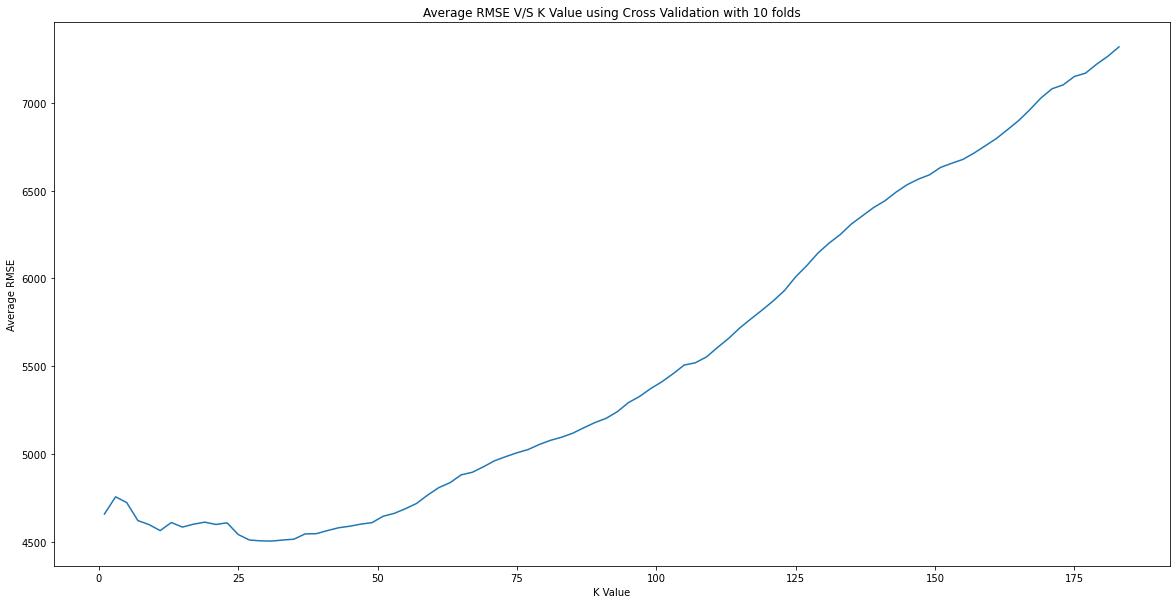

In [73]:
fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_cvavg.values()])
keys=[k for k in rmse_cvavg.keys()]

ax.plot(tk, values)
ax.set_xlabel('K Value')
ax.set_ylabel('Average RMSE')
ax.set_title('Average RMSE V/S K Value using Cross Validation with 10 folds')

print("Best Model Parameter is K = ",keys[list(values).index(values.min())],'with RMSE of ',values.min())
rmse_cvavg


## CONCLUSIONS

It is seen from above graph, best model is with parameter <B>K = 31 </B> with <B>Root Mean Square Error (RMSE) of 4505.803</B>
<BR><BR>

Also it can be seen that after <b>K = 31 </b> , model error  starts increasing, signifying <b> increase in variance </b> and that <b>model is Overfitting</b>


# L0 REGULARIZATION

### By researching and understanding material available through various websites and research papers, following points inferred about assignment task related to L0 Regularisation :

<ol>
    <li> L0 Regularisation means reducing model parameters to minimum</li>
    <li>L0 Regularization in our case means reducing no of features used without significant change in model accuracy</li>
</ol>


#### We will use hyperparameter value K = 31 as previously determined to give best model accuracy 

In [74]:
##Function to calculate K Nearest Neighbours as Single Column Data is treated as Series

def KNN2 (train_data,price,test_data,k):
    pred=[] #Value predicted by model
    
    for test in test_data:
        
        distances=[] ## Stores distance of test point from training points
        
        ##Calculates eucledian distance between test and train points

        for train in train_data:
            d = euc_dist(np.array(train),np.array(test))
            distances.append(d)

        
        distances=np.array(distances)
       
        ##Finds k nearest neighbors and thier values
        
        nearest=np.argsort(distances)[:k]
        near_values= [price[n] for n in nearest]
        
        ## Takes average of nearest neighbors values
        pred.append(np.average(near_values))
    
    return pred



In [75]:
fea=use_feature.copy() ##Copies use_feature list
fea.remove('price') ##Removes 'price' as element so it is not passed as feature to be used in prediction

rmse_f={} ##Dictionary to store RMSE values feature wise

for f1 in fea: ##Predicts value and then calculates RMSE of predicted value
    pred = KNN2(train_set[f1],train_set['price'],val_set[f1],31)
    rmse_f[f1]=(rmse(val_set['price'],pred))


RMSE values when single feature used : 
curb_weight  :  2542.625876115155
highway_mpg  :  2549.598156575432
city_mpg  :  2857.281488493693
width  :  3543.8990795332784
horsepower  :  3633.3330153126235
wheel_base  :  3767.7687667365026
length  :  3816.272270656666
aspiration  :  4075.9955480343865
fuel_type  :  4286.127624207339
compression_ratio  :  5142.820153857846
normalized_losses  :  5173.92263236713
bore  :  5595.822948149078
height  :  5663.343444357998
peak_rpm  :  6121.352365727603
stroke  :  6196.864109141743


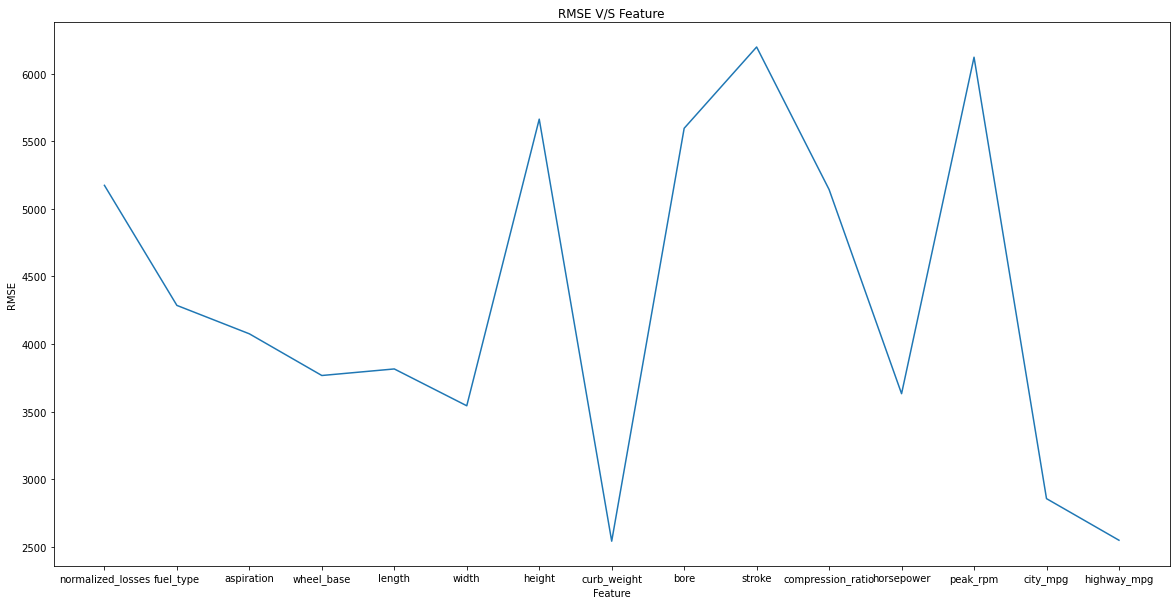

In [76]:
fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_f.values()])
keys=[k for k in rmse_f.keys()]

ax.plot(keys, values)
ax.set_xlabel('Feature')
ax.set_ylabel('RMSE')
ax.set_title('RMSE V/S Feature')

rmse_f_sort = dict(sorted(rmse_f.items(), key=lambda x: x[1]))

print('RMSE values when single feature used : ')
for f2,v in rmse_f_sort.items():
    print(f2, ' : ',v)



## OBSERVATIONS
<ul>
<li>curb_weight and highway_mpg have least Root Mean Square Error associated with them, signifying that they may be optimal features to use in model</li>

<li>height , bore , peak_rpm and stroke have very high Root Mean Square Error associated with them, signifying that they may not be optimal features to use in model</li>
</ul>

#### We will now take top 4 features with lowest error and using different permutations ofthese features we will see if model accuracy can be improved

In [79]:
top_4=[x for x in list(rmse_f_sort.keys())[0:4]] ##Fetches Top 4 Features with minimum RMSE

## All Possible Permutations with Top 4 features
perm=[[top_4[0],top_4[1]],[top_4[0],top_4[2]],[top_4[0],top_4[3]],[top_4[1],top_4[2]],[top_4[1],top_4[3]],[top_4[2],top_4[3]],[top_4[0],top_4[1],top_4[2]],[top_4[0],top_4[1],top_4[3]],[top_4[0],top_4[2],top_4[3]],[top_4[1],top_4[2],top_4[3]],top_4]

rmse_top = {} ##Dictionary to store RMSE value for each permutation

for p in perm: ##PPredicts Value using features in permutation and calculates RSME value
    pred = KNN(train_set[p],train_set['price'],val_set[p],31)
    rmse_top[perm.index(p)]=(rmse(val_set['price'],pred))

print('RMSE values for Different permutations of Top 4 Features :\n')
for f2,v in rmse_top.items():
    print(f2, ' : ',v)

RMSE values for Different permutations of Top 4 Features :

0  :  2457.3572319849563
1  :  1947.2193894580923
2  :  2269.2101407268215
3  :  2600.5401908207496
4  :  2310.963956020792
5  :  1859.0540843159429
6  :  2120.4045772029926
7  :  2211.5845969757956
8  :  1822.874268604046
9  :  2096.3257709869436
10  :  1915.7310552418007


Best Model Parameters : Features is  curb_weight city_mpg width   with RMSE of  1822.874268604046


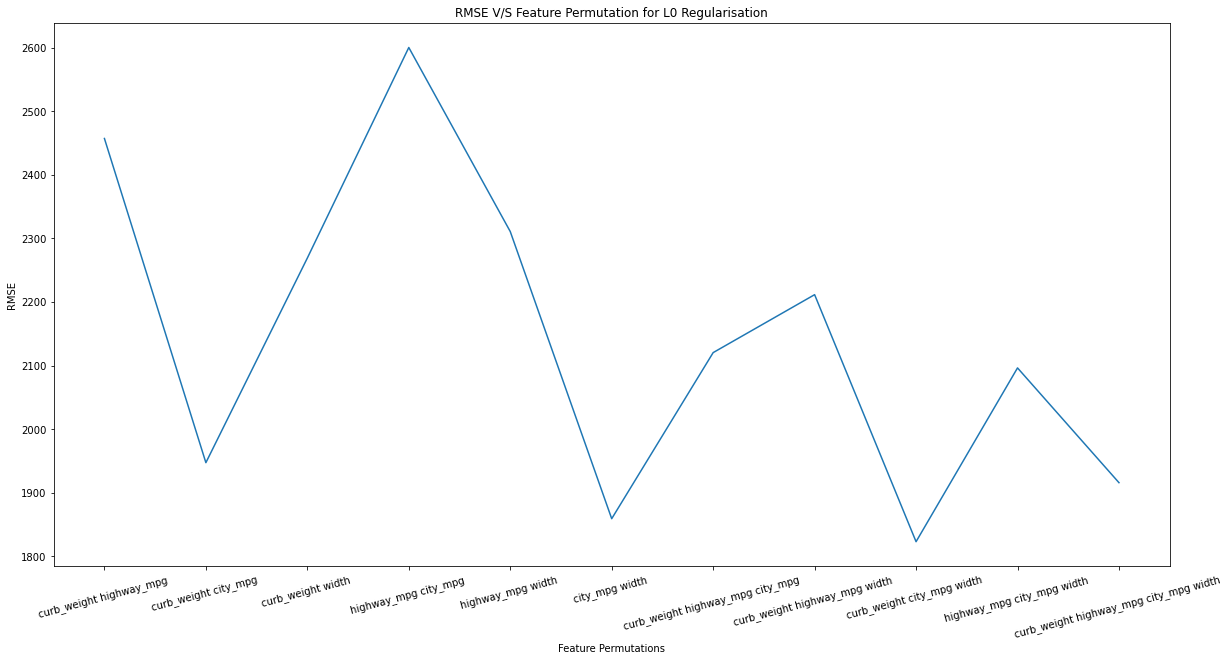

In [80]:

fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_top.values()])
keys=[]

for i in perm:
    s=''
    for j in i:
        s=s+j+" "
    keys.append(s)


ax.plot(keys, values)
ax.set_xlabel('Feature Permutations')
ax.set_ylabel('RMSE')
ax.set_title('RMSE V/S Feature Permutation for L0 Regularisation')
ax.tick_params(axis= 'x' , rotation=15, labelsize=10)

print('Best Model Parameters : Features is ',keys[list(values).index(values.min())],' with RMSE of ',values.min())



## CONCLUSIONS

It is seen from above graph, best model is with <B>curb_weight , city_mpg and width </B> used as features for prediction with <B>Root Mean Square Error (RMSE) of 1822.874</B>
<BR>

It can be seen that it reduces model RMSE by  <b>9.28% </b> over model using 15 features for predicting 'Price' with RMSE of 2009.423
<BR>

Also if further no of features used for prediction have to be reduced and slight increase in RMSE of model is acceptable then :

<ul>
        <li>city_mpg and width can be used with RMSE of 1859.054</li>
        <li>curb_weight and city_mpg can be used with RMSE of 1947.219</li>
</ul>
<BR>
    
### Also L0 Regularisation has improved Generalisation by <b>improving model accuracy</b>

## INFERENCES

#### Most important features identified for prediction by KNN in decreasing order are :
<ol>
    <li>curb_weight</li>
    <li>highway_mpg</li>
    <li>city_mpg</li>
    <li>width</li>
</ol>

#### According to my knowledge of real word price factors city_mpg  should be more important feature than curb_weight.
#### fuel_type and horsepower also should have been more important feature than curb_weight

# Question 2

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

##Sets the plots to be displayed and saved in notebook
%matplotlib inline 

plt.rcParams["figure.figsize"] = (20,3)

In [5]:
col_name=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income_bracket']

##Import Income training data
income_train = pd.read_csv('q2.csv',names=col_name)
print(income_train.shape)
income_train.head()


(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
##Import Income test data
income_test = pd.read_csv('q2_test.csv',names=col_name)

income_test.dropna(axis=0,inplace=True)
print(income_test.shape)
income_test.head()

(16281, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [7]:
##Finds how '?' is stored in data
s = income_test['workclass'][5]
s

' ?'

In [8]:
##Replaces '?' with Nan value and check how many Nan values
income_train = income_train.replace(s,np.nan)
income_test = income_test.replace(s,np.nan)
print('train',income_train.isnull().sum(),'test',income_test.isnull().sum(),sep='\n')

train
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_bracket       0
dtype: int64
test
age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income_bracket      0
dtype: int64


#### Null or Nan value are present in Nominal Features and thus thier value cannot be estimated from other entries in data and thus have to be removed<br>

In [9]:
#Drops rows with Nan value in one or more column
income_test.dropna(axis=0,inplace=True)
income_train.dropna(axis=0,inplace=True)
print(income_train.shape,income_test.shape)
print(income_train.isnull().sum(),income_test.isnull().sum(),sep='\n')

(30162, 15) (15060, 15)
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64


In [10]:
##Converts Target value to binary 0,1 for ease in analysis
##'<=50k' is replaced by 0 and '>50k' is replaced by 1
s1=income_test['income_bracket'][1]
s2=income_test['income_bracket'][3]

s3=income_train['income_bracket'][0]
s4=income_train['income_bracket'][215]

income_test.replace(s1,0,inplace=True)
income_test.replace(s2,1,inplace=True)

income_train.replace(s3,0,inplace=True)
income_train.replace(s4,1,inplace=True)


In [11]:
##Reduce no of unique values in nominal feature for ease in analysis

income_test['education'].replace(' Preschool', 'Uneducated',inplace=True)
income_test['education'].replace(' 10th', 'Uneducated',inplace=True)
income_test['education'].replace(' 11th', 'Uneducated',inplace=True)
income_test['education'].replace(' 12th', 'Uneducated',inplace=True)
income_test['education'].replace(' 1st-4th', 'Uneducated',inplace=True)
income_test['education'].replace(' 5th-6th', 'Uneducated',inplace=True)
income_test['education'].replace(' 7th-8th', 'Uneducated',inplace=True)
income_test['education'].replace(' 9th', 'Uneducated',inplace=True)
income_test['education'].replace(' HS-grad', 'Grad',inplace=True)
income_test['education'].replace(' Some-college', 'Grad',inplace=True)
income_test['education'].replace(' Assoc-acdm', 'Grad',inplace=True)
income_test['education'].replace(' Assoc-voc', 'Grad',inplace=True)
income_test['education'].replace(' Prof-school', 'Masters',inplace=True)
income_test['education'].replace(' Bachelors', 'Bachelors',inplace=True)
income_test['education'].replace(' Doctorate', 'Doctorate',inplace=True)
income_test['education'].replace(' Masters', 'Masters',inplace=True)

income_train['education'].replace(' Preschool', 'Uneducated',inplace=True)
income_train['education'].replace(' 10th', 'Uneducated',inplace=True)
income_train['education'].replace(' 11th', 'Uneducated',inplace=True)
income_train['education'].replace(' 12th', 'Uneducated',inplace=True)
income_train['education'].replace(' 1st-4th', 'Uneducated',inplace=True)
income_train['education'].replace(' 5th-6th', 'Uneducated',inplace=True)
income_train['education'].replace(' 7th-8th', 'Uneducated',inplace=True)
income_train['education'].replace(' 9th', 'Uneducated',inplace=True)
income_train['education'].replace(' HS-grad', 'Grad',inplace=True)
income_train['education'].replace(' Some-college', 'Grad',inplace=True)
income_train['education'].replace(' Assoc-acdm', 'Grad',inplace=True)
income_train['education'].replace(' Assoc-voc', 'Grad',inplace=True)
income_train['education'].replace(' Prof-school', 'Masters',inplace=True)
income_train['education'].replace(' Bachelors', 'Bachelors',inplace=True)
income_train['education'].replace(' Doctorate', 'Doctorate',inplace=True)
income_train['education'].replace(' Masters', 'Masters',inplace=True)


##Drop features with either too many categoical values or features with continous values
income_train.drop('native_country',axis='columns',inplace=True)
income_test.drop('native_country',axis='columns',inplace=True)

income_train.drop('age',axis='columns',inplace=True)
income_test.drop('age',axis='columns',inplace=True)

income_train.drop('fnlwgt',axis='columns',inplace=True)
income_test.drop('fnlwgt',axis='columns',inplace=True)

income_train.drop('education_num',axis='columns',inplace=True)
income_test.drop('education_num',axis='columns',inplace=True)

income_train.drop('capital_gain',axis='columns',inplace=True)
income_test.drop('capital_gain',axis='columns',inplace=True)

income_train.drop('capital_loss',axis='columns',inplace=True)
income_test.drop('capital_loss',axis='columns',inplace=True)

income_train.drop('hours_per_week',axis='columns',inplace=True)
income_test.drop('hours_per_week',axis='columns',inplace=True)


In [43]:

def ent(vals): ##Function to calculate entropy
    val_count = Counter(vals)
    
    epy=0
    for v in val_count:
        p = val_count[v] / len(vals)
        epy -= p * np.log2(p)
    return epy

def info_gain(target, sdatacolval): ##Function to calculate Information Gain
    info_gain = ent(target)
    for s in sdatacolval:
        info_gain -= len(s) * ent(s) / len(target)
    return info_gain

def split(dataset, column): ##Splits the dataset based on value of feature mentioned in column variable
    split_data = []
    col_vals = income_train[column].unique()
    for col_val in col_vals:
        split_data.append(dataset[dataset[column] == col_val])
    return(split_data)

def child_split(dataset,column): ##Splits the dataset into n parts after splitting feature is decided where n is no of unique values of splitting feature
    child=[]
    split_data=[]
    col_vals = income_train[column].unique()
    for col_val in col_vals:
        split_data.append([col_val,dataset[dataset[column] == col_val]])
    for s in split_data:
        child.append([s[0],s[1].drop(column,axis='columns')])
    return child
        

def bsplit(dataset): ##Calculates Information Gain for each feature and then chooses best feature for splitting.
    maxgain = 0
    bestfeature = 0
    features = list(dataset.columns)
    features.remove('income_bracket')
    for feature in features:
        sdata = split(dataset, feature)
        sdatacolval = [data['income_bracket'] for data in sdata]
        gain = info_gain(dataset['income_bracket'], sdatacolval)
        if gain<=0:
            return None
        if gain > maxgain:
            maxgain, bestfeature = gain, feature

    return bestfeature, maxgain


In [44]:
class Node:

    def __init__( self, depth = 0, stump = (0,0)):
        self.depth = depth
        self.stump = stump
        self.child = {}
        self.isLeaf = True
        self.value = 0
        
    def predict( self, data ): ##Predicts target value
        
        if self.isLeaf: ##if current node is leaf node then its value is predicted 
            return self.value
        else:    ##Else node's child with value same as value of test point spliiting feature of parent node
            return self.child[data[self.stump[0]]].predict( data )
           
    
    def getStump(self,dataset): ##Gets the splitting criteria and data splits based on unique values of splitting feature
        best_split = bsplit(dataset)
        if best_split == None :
            return None
        data = child_split(dataset, best_split[0])            
        return (best_split[0],data)
        
    def train(self, X, y, maxLeafSize, maxDepth ):

        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.value = np.mean( y )
        else:
            
            self.stump = self.getStump(X)
            
            if self.stump == None :
                self.isLeaf = True
                self.value = np.mean(y)
            
            else:
                
                self.isLeaf = False
                for d in self.stump[1]:
                    self.child[d[0]] = Node(depth = self.depth + 1)
                    self.child[d[0]].train( d[1], d[1]['income_bracket'], maxLeafSize, maxDepth )
    
    def printnode(self): ##Prints Decision flow
        i = '\t'*self.depth
        j = '\t'*(self.depth+1)
        if self.stump != None:
            print(i,self.stump[0])
            if len(self.child) != 0:
                for c in self.child:
                    print(j,c)
                    self.child[c].printnode()
                    print()

class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, xt ):
        p=[]
        for xid ,x in xt.iterrows():
            p.append(self.root.predict(x))
            
        return p
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )
    
    def printtree(self,n):
        self.root.printnode()


In [45]:
DT = Tree( maxLeafSize = 500, maxDepth = 3 )
DT.train( income_train, income_train['income_bracket'] )
print('Decision Tree : ')
DT.printtree(DT.root)

 relationship
	  Not-in-family
	 education
		 Bachelors
		 occupation
			  Adm-clerical
			 0

			  Exec-managerial
			 0

			  Handlers-cleaners
			 0

			  Prof-specialty
			 0

			  Other-service
			 0

			  Sales
			 0

			  Transport-moving
			 0

			  Farming-fishing
			 0

			  Machine-op-inspct
			 0

			  Tech-support
			 0

			  Craft-repair
			 0

			  Protective-serv
			 0

			  Armed-Forces
			 0

			  Priv-house-serv
			 0


		 Grad
		 occupation
			  Adm-clerical
			 0

			  Exec-managerial
			 0

			  Handlers-cleaners
			 0

			  Prof-specialty
			 0

			  Other-service
			 0

			  Sales
			 0

			  Transport-moving
			 0

			  Farming-fishing
			 0

			  Machine-op-inspct
			 0

			  Tech-support
			 0

			  Craft-repair
			 0

			  Protective-serv
			 0

			  Armed-Forces
			 0

			  Priv-house-serv
			 0


		 Uneducated
		 occupation
			  Adm-clerical
			 0

			  Exec-managerial
			 0

			  Handlers-cleaners
			 0

			  Prof-specialty
			 0

			  Other-service
			 0

### Each indent level specifies the depth at which feature is being used for split

### After splitting criteria , next indent shows criteria value and next line shows further splitting criteria on the above value

### Value followed by zero in next line indicates previous value was leaf node

In [60]:
##Runs the model on income_test and calculates the error
col = list(income_test.columns)
col.remove('income_bracket')
pred = DT.predict(income_test[col])

actual = np.array(income_test['income_bracket'])##Correct Values
pred = np.array(pred) ##Predicted Values

pred=np.around(pred,decimals=0)

pred=np.int64(pred)

pred = np.where(pred < 0, 0, pred)

error=np.abs(pred-actual)

print("Model Error : ",(np.sum(error)/len(error))*100)


Model Error :  17.881806108897745


## OBSERVATION

### Error rate of above trained Decision Tree model on given test dataset is 17.88%

### Accuracy of above trained Decision Tree model on given test dataset is 82.12%

# Cross Validation

In [57]:
#We will use 10 fold Cross Validation
income = pd.concat([income_train,income_test])
error_depth={} ##Stores Average error of model for MaxDepth d

for d in range(1,8): #We check Max Depth Value from 1 to 7
    error_maxleaf={} ##Stores average error of model for each value of MaxLeaf Size 
    for maxleaf in range(100,1501,200): #MaxLeaf Size from 100 to 1500 with each step of 200 
        error=[] ##Stores
        for k in range(10):
            ##Split the data into train:validation = 90:10
            val_data = income[int(4522.2*k):int(4522.2*k)+4522]
            train_data = pd.concat([income[0:int(4522.2*k)],income[int(4522.2*k)+4522:]])
            
            ##Train model with MaxLeaf Size = maxleaf and maxDepth = d
            DT = Tree( maxLeafSize = maxleaf, maxDepth = d )
            DT.train( train_data, train_data['income_bracket'] )
            
            ##Predict labels for validation set
            col = list(income_test.columns)
            col.remove('income_bracket')
            pred = DT.predict(val_data[col])
            
            ##Calculate Error in prediction
            actual = np.array(val_data['income_bracket'])
            pred = np.array(pred)
            pred=np.around(pred,decimals=0)
            pred=np.int64(pred)
            pred = np.where(pred < 0, 0, pred)
            error.append(np.sum(np.abs(pred-actual)/len(pred)))
        
        error_maxleaf[maxleaf]=np.average(np.array(error))
    
    error_depth[d]=error_maxleaf

Error at Depth  1  :  [24.78328173 24.78328173 24.78328173 24.78328173 24.78328173 24.78328173
 24.78328173 24.78328173]
Error at Depth  2  :  [19.00044228 19.00044228 19.00044228 19.00044228 19.00044228 19.00044228
 19.00044228 19.00044228]
Error at Depth  3  :  [18.58690845 18.58690845 18.5979655  18.5979655  18.56479434 18.56479434
 18.56479434 18.56479434]
Error at Depth  4  :  [18.50287483 18.50066342 18.51172048 18.52498894 18.48960637 18.48960637
 18.56258293 18.56258293]
Error at Depth  5  :  [18.50508625 18.51172048 18.51835471 18.53162318 18.48960637 18.48960637
 18.56258293 18.56258293]
Error at Depth  6  :  [18.50508625 18.51172048 18.51835471 18.53162318 18.48960637 18.48960637
 18.56258293 18.56258293]
Error at Depth  7  :  [18.50508625 18.51172048 18.51835471 18.53162318 18.48960637 18.48960637
 18.56258293 18.56258293]
Best Model parameters : MaxDepth =  4  MaxLeaf Size =  900  with Error :  18.48960636886334 %
Difference in Error at each MAxDepth value d : 
 [[0.0], [0

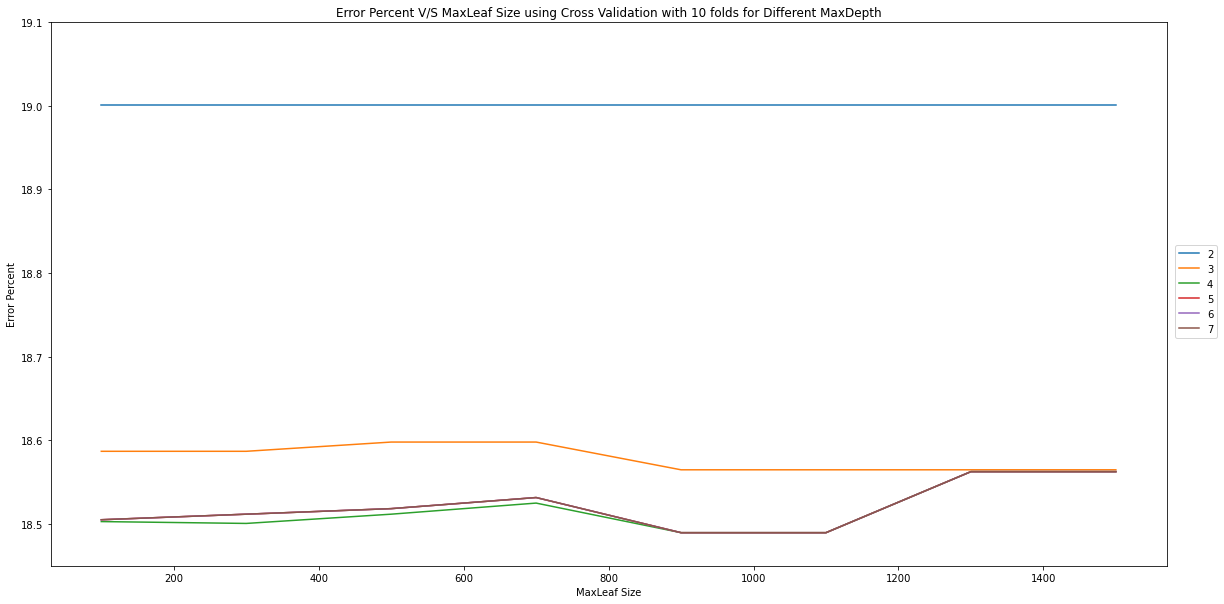

In [59]:
fig , ax = plt.subplots(1)

min1=[]
diff=[]
for d in range(1,8):
    
    values=np.array([x*100 for x in error_depth[d].values()])
    print('Error at Depth ',d,' : ',values)
    keys=[k for k in error_depth[d].keys()]
    if(d!=1):
        ax.plot(keys, values,label=d)
    min1.append([values.min(),keys[list(values).index(values.min())]])
    diff.append([values.max()-values.min()])
    
ax.set_xlabel('MaxLeaf Size')
ax.set_ylabel('Error Percent')
ax.set_ylim(18.45,19.1)
ax.set_title('Error Percent V/S MaxLeaf Size using Cross Validation with 10 folds for Different MaxDepth')
ax.legend(bbox_to_anchor = (1.05, 0.6))

minimum=100
depth=maxleaf=0
for m in min1:
    if(m[0]<minimum):
        minimum=m[0]
        depth ,maxleaf = min1.index(m)+1 , m[1]

print("Best Model parameters : MaxDepth = ",depth,' MaxLeaf Size = ',maxleaf, ' with Error : ' ,minimum,'%') 
print('Difference in Error at each MAxDepth value d : \n',diff)

## Conclusions

#### As can be seen from output printed and graph plotted that Error remains nearly same and then becomes equal for Hyperparameter Max Depth value from 4 to 7

#### Changing MaxLeaf Size has very insignificant impact on Error in case of our model , approximately 0.1% increase or decrease in Error

#### Error for Max Depth = 1 is 24.783% irrespective of MaxLeaf Size as is significantly higher than Error of other Max Depth values , so it is not shown in graph

#### Error for Max Depth = 2 is 19.0004% and also remains invariant towards value of MaxLeaf Size

#### We get Best Model performance for Max Depth = 4 and MaxLeaf Size = 900 with Error of 18.489% and Accuracy of 81.511% 

#### As Increasing Max Depth has no positive effect on Error so having shorter tree will give better performance at test time